### Import libraries

In [24]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import csv

### Process Kidney data

##### Load gene expression matrix

In [25]:
anndata_kidney = sc.read_mtx('D:\\vostro\\Degree\\PhD\\RA\\Publication\\Kidney\\E-CURD-119-quantification-raw-files\\E-CURD-119.aggregated_filtered_counts.mtx')

In [26]:
df_kidney = anndata_kidney.to_df()

In [27]:
df_kidney

,0,1,2,3,4,5,6,7,8,9,...,12647,12648,12649,12650,12651,12652,12653,12654,12655,12656
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Load genes and cell type information for kidney

In [28]:
index_kidney = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\Kidney\\E-CURD-119-quantification-raw-files\\E-CURD-119.aggregated_filtered_counts.mtx_rows', names = ['col1', 'col2'], sep = '\t')
cols_kidney = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\Kidney\\E-CURD-119-quantification-raw-files\\E-CURD-119.aggregated_filtered_counts.mtx_cols', names = ['col1'])

In [29]:
index_kidney = index_kidney.drop(['col2'], axis = 1)
index_kidney

,col1
0,ENSG00000000003
1,ENSG00000000005
2,ENSG00000000419
3,ENSG00000000457
4,ENSG00000000460
...,...
22787,ENSG00000289695
22788,ENSG00000289697
22789,ENSG00000289700
22790,ENSG00000289701


In [30]:
cols_kidney.head()

,col1
0,SAMN15040593-AAACCTGCATGCCTAA
1,SAMN15040593-AAACGGGAGTACATGA
2,SAMN15040593-AAACGGGCAAAGCGGT
3,SAMN15040593-AAAGCAACAAAGGAAG
4,SAMN15040593-AAAGCAACAACGATGG


##### Load Reference data of Kidney

In [31]:
ref_data_kidney = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\Kidney\\ExpDesign-E-CURD-119.tsv', sep = '\t')

In [32]:
ref_data_kidney.head()

,Assay,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[ethnic group],Sample Characteristic Ontology Term[ethnic group],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],...,Sample Characteristic[organism part],Sample Characteristic Ontology Term[organism part],Sample Characteristic[clinical information],Sample Characteristic Ontology Term[clinical information],Factor Value[sex],Factor Value Ontology Term[sex],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels]
0,SAMN15040593-AAACCTGCATGCCTAA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Healthy5,NaN,European,http://purl.obolibrary.org/obo/HANCESTRO_0005,female,http://purl.obolibrary.org/obo/PATO_0000383,52 year,...,cortex of kidney,http://purl.obolibrary.org/obo/UBERON_0001225,glomerular filtration rate 98 ml/min/1.73âm2...,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,NaN,NaN,NaN,NaN
1,SAMN15040593-AAACGGGAGTACATGA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Healthy5,NaN,European,http://purl.obolibrary.org/obo/HANCESTRO_0005,female,http://purl.obolibrary.org/obo/PATO_0000383,52 year,...,cortex of kidney,http://purl.obolibrary.org/obo/UBERON_0001225,glomerular filtration rate 98 ml/min/1.73âm2...,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,kidney loop of Henle thick ascending limb epit...,NaN,thick ascending limb,NaN
2,SAMN15040593-AAACGGGCAAAGCGGT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Healthy5,NaN,European,http://purl.obolibrary.org/obo/HANCESTRO_0005,female,http://purl.obolibrary.org/obo/PATO_0000383,52 year,...,cortex of kidney,http://purl.obolibrary.org/obo/UBERON_0001225,glomerular filtration rate 98 ml/min/1.73âm2...,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,fibroblast,http://purl.obolibrary.org/obo/CL_0000057,fibroblast,http://purl.obolibrary.org/obo/CL_0000057
3,SAMN15040593-AAAGCAACAAAGGAAG,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Healthy5,NaN,European,http://purl.obolibrary.org/obo/HANCESTRO_0005,female,http://purl.obolibrary.org/obo/PATO_0000383,52 year,...,cortex of kidney,http://purl.obolibrary.org/obo/UBERON_0001225,glomerular filtration rate 98 ml/min/1.73âm2...,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,NaN,NaN,NaN,NaN
4,SAMN15040593-AAAGCAACAACGATGG,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,Healthy5,NaN,European,http://purl.obolibrary.org/obo/HANCESTRO_0005,female,http://purl.obolibrary.org/obo/PATO_0000383,52 year,...,cortex of kidney,http://purl.obolibrary.org/obo/UBERON_0001225,glomerular filtration rate 98 ml/min/1.73âm2...,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,kidney distal convoluted tubule epithelial cell,NaN,distal convoluted tubule 1,http://purl.obolibrary.org/obo/UBERON_0001292


In [33]:
ref_data_kidney.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[ethnic group]',
       'Sample Characteristic Ontology Term[ethnic group]',
       'Sample Characteristic[sex]',
       'Sample Characteristic Ontology Term[sex]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic Ontology Term[developmental stage]',
       'Sample Characteristic[disease]',
       'Sample Characteristic Ontology Term[disease]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Sample Characteristic[clinical information]',
       'Sample Characteristic Ontology Term[clinical information]',
       'Factor Value[sex]', 'Factor Value Ontology Term[sex]',


In [34]:
ref_data_kidney = ref_data_kidney.rename(columns={'Factor Value[inferred cell type - authors labels]' : 'Cell_Type', 'Factor Value Ontology Term[inferred cell type - authors labels]' : 'CL_ID'})

In [35]:
ref_data_mod_kidney = ref_data_kidney[['Assay', 'Cell_Type', 'CL_ID']]

In [36]:
ref_data_mod_kidney['CL_ID'] = ref_data_mod_kidney['CL_ID'].str.split('/').str[-1]

ref_data_mod_kidney['CL_ID'] = ref_data_mod_kidney['CL_ID'].str.replace('_', ':')

ref_data_mod_kidney

C:\Users\Supriya\AppData\Local\Temp\ipykernel_9988\2313623117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data_mod_kidney['CL_ID'] = ref_data_mod_kidney['CL_ID'].str.split('/').str[-1]
C:\Users\Supriya\AppData\Local\Temp\ipykernel_9988\2313623117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data_mod_kidney['CL_ID'] = ref_data_mod_kidney['CL_ID'].str.replace('_', ':')


,Assay,Cell_Type,CL_ID
0,SAMN15040593-AAACCTGCATGCCTAA,NaN,NaN
1,SAMN15040593-AAACGGGAGTACATGA,thick ascending limb,NaN
2,SAMN15040593-AAACGGGCAAAGCGGT,fibroblast,CL:0000057
3,SAMN15040593-AAAGCAACAAAGGAAG,NaN,NaN
4,SAMN15040593-AAAGCAACAACGATGG,distal convoluted tubule 1,UBERON:0001292
...,...,...,...
12652,SAMN15040597-TTTGTCAGTTCCGTCT,principle cell,NaN
12653,SAMN15040597-TTTGTCATCACCAGGC,NaN,NaN
12654,SAMN15040597-TTTGTCATCACCGTAA,connecting tubule,NaN
12655,SAMN15040597-TTTGTCATCCTACAGA,distal convoluted tubule 1,UBERON:0001292


In [37]:
# Create a mapping using dataframe2
mapping = ref_data_mod_kidney.set_index('Assay')['Cell_Type']

# Use the map function to replace values in dataframe1
cols_kidney['col1'] = cols_kidney['col1'].map(mapping)

# Display the modified dataframe1
print(cols_kidney)

                             col1
0                             NaN
1            thick ascending limb
2                      fibroblast
3                             NaN
4      distal convoluted tubule 1
...                           ...
12652              principle cell
12653                         NaN
12654           connecting tubule
12655  distal convoluted tubule 1
12656  distal convoluted tubule 1

[12657 rows x 1 columns]


In [38]:
cols_kidney.value_counts()

col1                                 
thick ascending limb                     2533
proximal tubule                          1835
distal convoluted tubule 1               1573
connecting tubule                        1052
Type A intercalated cell                  746
principle cell                            562
endothelial cell                          344
podocyte                                  341
distal convoluted tubule 2                305
parietal epithelial cell                  266
proximal tubule with VCAM1 expression     233
Type B intercalated cell                  209
mesangial cell                             99
fibroblast                                 70
leukocyte                                  10
Name: count, dtype: int64

### Process Liver data

In [39]:
anndata_liver = sc.read_mtx('D:\\vostro\\Degree\\PhD\\RA\\Publication\\2-experiment-files\\E-MTAB-10553\\E-MTAB-10553.aggregated_filtered_normalised_counts.mtx')

In [40]:
df_liver = anndata_liver.to_df()

In [41]:
df_liver.shape

(22813, 17123)

In [42]:
df_liver.describe()

,0,1,2,3,4,5,6,7,8,9,...,17113,17114,17115,17116,17117,17118,17119,17120,17121,17122
count,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,...,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000,22813.000000
mean,43.834660,43.834656,43.834660,43.834656,43.834652,43.834656,43.834656,43.834652,43.834652,43.834660,...,43.834656,43.834652,43.834656,43.834656,43.834656,43.834656,43.834656,43.834652,43.834652,43.834660
std,785.774841,1326.309448,371.045776,339.496094,855.597534,254.496109,420.876526,293.130219,410.202118,347.245880,...,383.561523,423.601593,354.239777,409.092865,337.313141,390.767426,475.131195,355.193146,391.404785,408.754547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51764.710938,177121.765625,17745.564453,13677.338867,83333.328125,9573.541992,21337.126953,15471.166992,23597.619141,18018.019531,...,21052.632812,19729.136719,14090.018555,18114.257812,19554.773438,18820.123047,32651.488281,16708.353516,21068.859375,16702.546875


##### Load genes and cell type information  for liver

In [44]:
index_liver = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\2-experiment-files\\E-MTAB-10553\\E-MTAB-10553.aggregated_filtered_normalised_counts.mtx_rows', names = ['col1', 'col2'], sep = '\t')
cols_liver = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\2-experiment-files\\E-MTAB-10553\\E-MTAB-10553.aggregated_filtered_normalised_counts.mtx_cols', names = ['col1'])

In [53]:
index_liver = index_liver.drop(['col2'], axis = 1)
index_liver

,col1
0,ENSG00000000003
1,ENSG00000000005
2,ENSG00000000419
3,ENSG00000000457
4,ENSG00000000460
...,...
22808,ENSG00000289695
22809,ENSG00000289697
22810,ENSG00000289700
22811,ENSG00000289701


##### Load Reference data of Kidney

In [46]:
ref_data_liver = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\2-experiment-files\\E-MTAB-10553\\ExpDesign-E-MTAB-10553.tsv', sep = '\t')

In [47]:
ref_data_liver.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[sex]',
       'Sample Characteristic Ontology Term[sex]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic Ontology Term[developmental stage]',
       'Sample Characteristic[disease]',
       'Sample Characteristic Ontology Term[disease]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Sample Characteristic[cell type]',
       'Sample Characteristic Ontology Term[cell type]',
       'Factor Value[cell type]', 'Factor Value Ontology Term[cell type]',
       'Factor Value[inferred cell type - ontology labels]',
       'Factor Value Ontology Term[inferred cell type -

In [48]:
ref_data_liver = ref_data_liver.rename(columns={'Factor Value[inferred cell type - authors labels]': 'Cell_Type', 'Factor Value Ontology Term[inferred cell type - authors labels]' : 'CL_ID'})

In [49]:
ref_data_1_liver = ref_data_liver[['Assay', 'Cell_Type', 'CL_ID']]

In [50]:
ref_data_1_liver['CL_ID'] = ref_data_1_liver['CL_ID'].str.split('/').str[-1]

C:\Users\Supriya\AppData\Local\Temp\ipykernel_9988\3746975067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data_1_liver['CL_ID'] = ref_data_1_liver['CL_ID'].str.split('/').str[-1]


In [51]:
ref_data_1_liver['CL_ID'] = ref_data_1_liver['CL_ID'].str.replace('_', ':')

C:\Users\Supriya\AppData\Local\Temp\ipykernel_9988\2463954554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data_1_liver['CL_ID'] = ref_data_1_liver['CL_ID'].str.replace('_', ':')


In [52]:
ref_data_1_liver

,Assay,Cell_Type,CL_ID
0,SAMEA11294524-AAAACTCGTCCGAAGA,NaN,NaN
1,SAMEA11294524-AAACCTGAGTCTCCTC,hepatocyte,CL:0000182
2,SAMEA11294524-AAACCTGCAATGTAAG,monocyte-derived macrophage,CL:0000235
3,SAMEA11294524-AAACCTGCACCGATAT,T cell,CL:0000084
4,SAMEA11294524-AAACCTGCAGTAAGCG,NaN,NaN
...,...,...,...
17118,SAMEA11294531-TTTGGTTCACGGTTTA,T cell,CL:0000084
17119,SAMEA11294531-TTTGGTTGTGACGCCT,NaN,NaN
17120,SAMEA11294531-TTTGGTTTCCAAATGC,monocyte-derived macrophage,CL:0000235
17121,SAMEA11294531-TTTGTCAAGATCTGCT,Kupffer cell,CL:0000091


In [69]:
ref_data_1_liver['Cell_Type'].value_counts()

Cell_Type
T cell                               7676
liver sinusoidal endothelial cell    2337
monocyte-derived macrophage          1635
natural killer cell                   919
hepatocyte                            802
Kupffer cell                          623
B cell                                405
cholangiocyte                         309
plasma cell                           164
cycling cell                           61
vascular endothelial cell 1            24
activated HSC                          24
vascular endothelial cell 2            17
quiescent HSC                           3
mesothelial cell                        1
Name: count, dtype: int64

In [54]:
# Create a mapping using dataframe2
mapping = ref_data_1_liver.set_index('Assay')['Cell_Type']

# Use the map function to replace values in dataframe1
cols_liver['col1'] = cols_liver['col1'].map(mapping)

# Display the modified dataframe1
print(cols_liver)

                              col1
0                              NaN
1                       hepatocyte
2      monocyte-derived macrophage
3                           T cell
4                              NaN
...                            ...
17118                       T cell
17119                          NaN
17120  monocyte-derived macrophage
17121                 Kupffer cell
17122                       B cell

[17123 rows x 1 columns]


### Loading Lung data

In [55]:
anndata_lung = sc.read_mtx('D:\\vostro\\Degree\\PhD\\RA\\Publication\\1-experiment-files\\E-GEOD-130148\\E-GEOD-130148.aggregated_filtered_normalised_counts.mtx')

In [56]:
df_lung = anndata_lung.to_df()

In [57]:
df_lung

,0,1,2,3,4,5,6,7,8,9,...,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565
0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,314.6633,0.0,0.0,390.472473,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,1592.356689,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19201,0.0000,0.0,0.0,0.000000,224.215256,0.0,0.0,284.414093,1135.07373,0.0,...,0.0,0.0,383.215179,436.681213,0.0,404.530792,398.089172,0.0,0.0,0.0
19202,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
19203,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
19204,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


##### Load genes and cell type information for lung

In [58]:
index_lung = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\1-experiment-files\\E-GEOD-130148\\E-GEOD-130148.aggregated_filtered_normalised_counts.mtx_rows', names = ['col1', 'col2'], sep = '\t')
cols_lung = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\1-experiment-files\\E-GEOD-130148\\E-GEOD-130148.aggregated_filtered_normalised_counts.mtx_cols', names = ['col1'])

In [59]:
index_lung = index_lung.drop(['col2'], axis = 1)

In [60]:
ref_data_lung = pd.read_csv('D:\\vostro\\Degree\\PhD\\RA\\Publication\\1-experiment-files\\E-GEOD-130148\\ExpDesign-E-GEOD-130148.tsv', sep = '\t')

In [61]:
ref_data_lung.head()

,Assay,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[organism part],...,Sample Characteristic[clinical information],Sample Characteristic Ontology Term[clinical information],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[clinical information],Factor Value Ontology Term[clinical information],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels]
0,SRR8942433-AAAACGAATTCT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NaN,62 year,NaN,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,...,smoker; over 100 per year,NaN,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NaN,lung macrophage,http://purl.obolibrary.org/obo/CL_1001603
1,SRR8942433-AAAATAATCTGT,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NaN,62 year,NaN,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,...,smoker; over 100 per year,NaN,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NaN,type II pneumocyte,http://purl.obolibrary.org/obo/CL_0002063
2,SRR8942433-AAAGACTGTCAA,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NaN,62 year,NaN,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,...,smoker; over 100 per year,NaN,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NaN,type II pneumocyte,http://purl.obolibrary.org/obo/CL_0002063
3,SRR8942433-AAAGCGGATCGC,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NaN,62 year,NaN,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,...,smoker; over 100 per year,NaN,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NaN,lung macrophage,http://purl.obolibrary.org/obo/CL_1001603
4,SRR8942433-AAAGGGCGATGG,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,muc3843,NaN,62 year,NaN,male,http://purl.obolibrary.org/obo/PATO_0000384,lung parenchyma,...,smoker; over 100 per year,NaN,upper lobe of left lung,http://purl.obolibrary.org/obo/UBERON_0008952,chronic obstructive pulmonary disease,http://www.ebi.ac.uk/efo/EFO_0000341,smoker; over 100 per year,NaN,lung macrophage,http://purl.obolibrary.org/obo/CL_1001603


In [62]:
ref_data_lung.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[sex]',
       'Sample Characteristic Ontology Term[sex]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Sample Characteristic[sampling site]',
       'Sample Characteristic Ontology Term[sampling site]',
       'Sample Characteristic[disease]',
       'Sample Characteristic Ontology Term[disease]',
       'Sample Characteristic[disease staging]',
       'Sample Characteristic Ontology Term[disease staging]',
       'Sample Characteristic[clinical information]',
       'Sample Characteristic Ontology Term[clinical information]',
       'Factor Value[sampling site]',
       'Factor Value Ontology T

In [63]:
ref_data_lung = ref_data_lung.rename(columns={'Factor Value[inferred cell type - ontology labels]' : 'Cell_Type', 'Factor Value Ontology Term[inferred cell type - ontology labels]' : 'CL_ID'})

In [64]:
ref_data_1_lung = ref_data_lung[['Assay', 'Cell_Type', 'CL_ID']]

In [65]:
ref_data_1_lung['CL_ID'] = ref_data_1_lung['CL_ID'].str.split('/').str[-1]

C:\Users\Supriya\AppData\Local\Temp\ipykernel_9988\3971447701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data_1_lung['CL_ID'] = ref_data_1_lung['CL_ID'].str.split('/').str[-1]


In [66]:
ref_data_1_lung['CL_ID'] = ref_data_1_lung['CL_ID'].str.replace('_', ':')

C:\Users\Supriya\AppData\Local\Temp\ipykernel_9988\3039522715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data_1_lung['CL_ID'] = ref_data_1_lung['CL_ID'].str.replace('_', ':')


In [67]:
ref_data_1_lung

,Assay,Cell_Type,CL_ID
0,SRR8942433-AAAACGAATTCT,lung macrophage,CL:1001603
1,SRR8942433-AAAATAATCTGT,type II pneumocyte,CL:0002063
2,SRR8942433-AAAGACTGTCAA,type II pneumocyte,CL:0002063
3,SRR8942433-AAAGCGGATCGC,lung macrophage,CL:1001603
4,SRR8942433-AAAGGGCGATGG,lung macrophage,CL:1001603
...,...,...,...
3561,SRR8942436-TTTTAGCGCTCA,B cell,CL:0000236
3562,SRR8942436-TTTTCTACCCTA,natural killer cell,CL:0000623
3563,SRR8942436-TTTTGTAATATA,T cell,CL:0000084
3564,SRR8942436-TTTTTCGCGCGG,B cell,CL:0000236


In [68]:
ref_data_1_lung['Cell_Type'].value_counts()

Cell_Type
lung macrophage                1180
type II pneumocyte              494
B cell                          272
mast cell                       237
transformed epithelial cell     180
T cell                          178
lung ciliated cell              175
lung secretory cell             128
type I pneumocyte               101
fibroblast of lung               75
lymphocyte                       66
lung endothelial cell            60
natural killer cell              56
Name: count, dtype: int64

In [70]:
# Create a mapping using dataframe2
mapping = ref_data_1_lung.set_index('Assay')['Cell_Type']

# Use the map function to replace values in dataframe1
cols_lung['col1'] = cols_lung['col1'].map(mapping)

# Display the modified dataframe1
print(cols_lung)

                     col1
0         lung macrophage
1      type II pneumocyte
2      type II pneumocyte
3         lung macrophage
4         lung macrophage
...                   ...
3561               B cell
3562  natural killer cell
3563               T cell
3564               B cell
3565            mast cell

[3566 rows x 1 columns]


#### Get the HGNC gene name using ensemble id

In [71]:
with open('D:\\vostro\\Degree\\PhD\RA\\Publication\\Homo_sapiens.GRCh37.87.chr.gtf\\Homo_sapiens.GRCh37.87.chr.gtf') as f:
    gtf = list(f)
    
gtf = [x for x in gtf if not x.startswith('#')]

In [72]:
len(gtf)

2612761

In [73]:
gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]

In [74]:
len(gtf)

2612761

In [75]:
gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))

In [76]:
gtf = dict(gtf)

##### Get HGNC_SYMBOL from ensemble ids for all the three organs (Kidney, Liver, Lung)

In [77]:
index_kidney['gene_name'] = index_kidney['col1'].map(gtf)
index_kidney.head()

,col1,gene_name
0,ENSG00000000003,TSPAN6
1,ENSG00000000005,TNMD
2,ENSG00000000419,DPM1
3,ENSG00000000457,SCYL3
4,ENSG00000000460,C1orf112


In [83]:
index_lung['gene_name'] = index_lung['col1'].map(gtf)

In [84]:
index_lung.head()

,col1,gene_name
0,ENSG00000000003,TSPAN6
1,ENSG00000000419,DPM1
2,ENSG00000000457,SCYL3
3,ENSG00000000460,C1orf112
4,ENSG00000000938,FGR


In [79]:
index_liver['gene_name'] = index_liver['col1'].map(gtf)

In [80]:
index_liver.head()

,col1,gene_name
0,ENSG00000000003,TSPAN6
1,ENSG00000000005,TNMD
2,ENSG00000000419,DPM1
3,ENSG00000000457,SCYL3
4,ENSG00000000460,C1orf112


In [78]:
index_val_kidney = index_kidney['gene_name'].tolist()
col_val_kidney = cols_kidney['col1'].tolist()

In [81]:
index_val_liver = index_liver['gene_name'].tolist()
col_val_liver = cols_liver['col1'].tolist()

In [85]:
index_val_lung = index_lung['gene_name'].tolist()
col_val_lung = cols_lung['col1'].tolist()

In [86]:
print(len(index_val_kidney), len(col_val_kidney))

22792 12657


In [87]:
print(len(index_val_liver), len(col_val_liver))

22813 17123


In [88]:
print(len(index_val_lung), len(col_val_lung))

19206 3566


### Convert the dataframe to anndata for analysis

1. average gene expression
2. wilcoxon method to compute pval and logfoldchange (Differential gene expression) 

In [89]:
anndata_kidney = anndata_kidney.T

In [90]:
print(set(col_val_kidney))

{'principle cell', 'Type B intercalated cell', 'proximal tubule with VCAM1 expression', 'connecting tubule', 'Type A intercalated cell', 'thick ascending limb', 'parietal epithelial cell', 'distal convoluted tubule 1', nan, 'distal convoluted tubule 2', 'mesangial cell', 'proximal tubule', 'leukocyte', 'endothelial cell', 'fibroblast', 'podocyte'}


In [91]:
anndata_kidney.obs["cell_Type"] = col_val_kidney
anndata_kidney.var["Genes"] = index_val_kidney

In [92]:
anndata_kidney.obs["cell_Type"].unique()

array([nan, 'thick ascending limb', 'fibroblast',
       'distal convoluted tubule 1', 'proximal tubule',
       'Type A intercalated cell', 'principle cell', 'connecting tubule',
       'distal convoluted tubule 2', 'podocyte', 'endothelial cell',
       'Type B intercalated cell', 'parietal epithelial cell',
       'proximal tubule with VCAM1 expression', 'mesangial cell',
       'leukocyte'], dtype=object)

In [93]:
print(anndata_kidney.var.head())

      Genes
0    TSPAN6
1      TNMD
2      DPM1
3     SCYL3
4  C1orf112


In [94]:
anndata_kidney.var.index = anndata_kidney.var['Genes']

In [95]:
anndata_kidney.var.drop(columns='Genes', inplace=True)
print(anndata_kidney.var.head())

Empty DataFrame
Columns: []
Index: [TSPAN6, TNMD, DPM1, SCYL3, C1orf112]


In [99]:
anndata_liver = anndata_liver.T

In [104]:
print(set(col_val_liver))

{'quiescent HSC', 'B cell', 'mesothelial cell', 'vascular endothelial cell 2', 'cycling cell', 'hepatocyte', nan, 'plasma cell', 'cholangiocyte', 'activated HSC', 'vascular endothelial cell 1', 'Kupffer cell', 'T cell', 'liver sinusoidal endothelial cell', 'natural killer cell', 'monocyte-derived macrophage'}


In [105]:
anndata_liver.obs["cell_Type"] = col_val_liver
anndata_liver.var["Genes"] = index_val_liver

In [106]:
anndata_liver.obs["cell_Type"].unique()

array([nan, 'hepatocyte', 'monocyte-derived macrophage', 'T cell',
       'liver sinusoidal endothelial cell', 'natural killer cell',
       'cycling cell', 'plasma cell', 'B cell', 'cholangiocyte',
       'Kupffer cell', 'vascular endothelial cell 1',
       'vascular endothelial cell 2', 'activated HSC', 'quiescent HSC',
       'mesothelial cell'], dtype=object)

In [107]:
print(anndata_liver.var.head())

      Genes
0    TSPAN6
1      TNMD
2      DPM1
3     SCYL3
4  C1orf112


In [108]:
anndata_liver.var.index = anndata_liver.var['Genes']

In [110]:
anndata_liver.var.drop(columns='Genes', inplace=True)
print(anndata_liver.var.head())

Empty DataFrame
Columns: []
Index: [TSPAN6, TNMD, DPM1, SCYL3, C1orf112]


In [116]:
anndata_lung = anndata_lung.T

In [113]:
print(set(col_val_lung))

{'lymphocyte', 'fibroblast of lung', 'B cell', nan, 'lung endothelial cell', 'mast cell', 'type II pneumocyte', 'type I pneumocyte', 'lung macrophage', 'T cell', 'transformed epithelial cell', 'natural killer cell', 'lung secretory cell', 'lung ciliated cell'}


In [118]:
anndata_lung.obs["cell_Type"] = col_val_lung
anndata_lung.var["Genes"] = index_val_lung

In [120]:
anndata_lung.obs["cell_Type"].unique()

array(['lung macrophage', 'type II pneumocyte', 'T cell',
       'type I pneumocyte', 'lung secretory cell', nan, 'mast cell',
       'lung ciliated cell', 'natural killer cell',
       'transformed epithelial cell', 'lymphocyte',
       'lung endothelial cell', 'fibroblast of lung', 'B cell'],
      dtype=object)

In [121]:
print(anndata_lung.var.head())

      Genes
0    TSPAN6
1      DPM1
2     SCYL3
3  C1orf112
4       FGR


In [124]:
anndata_lung.var.index = anndata_lung.var['Genes']

In [125]:
anndata_lung.var.drop(columns='Genes', inplace=True)
print(anndata_lung.var.head())

Empty DataFrame
Columns: []
Index: [TSPAN6, DPM1, SCYL3, C1orf112, FGR]


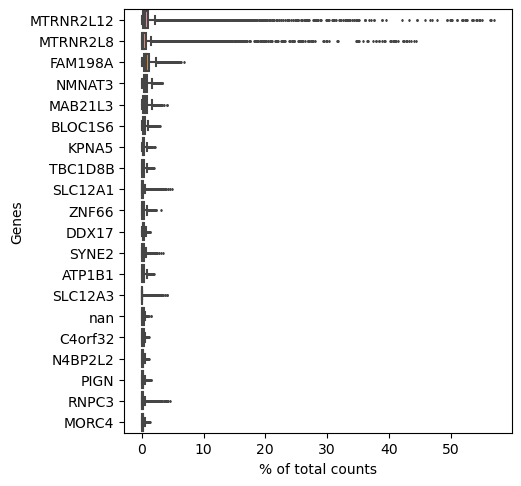

In [101]:
sc.pl.highest_expr_genes(anndata_kidney, n_top=20, )

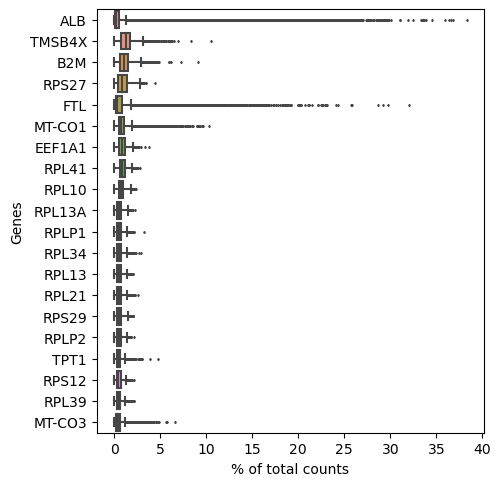

In [111]:
sc.pl.highest_expr_genes(anndata_liver, n_top=20, )

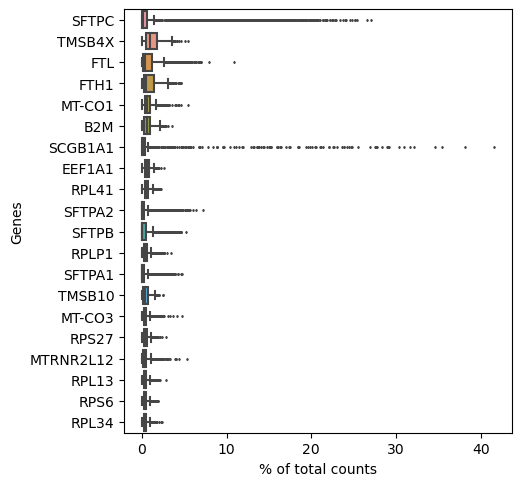

In [126]:
sc.pl.highest_expr_genes(anndata_lung, n_top=20, )

In [127]:
sc.pp.filter_cells(anndata_kidney, min_genes=200)  # Example: Filter cells with at least 200 genes
sc.pp.normalize_total(anndata_kidney)              # Normalize the kidney data
sc.pp.log1p(anndata_kidney)  

sc.pp.filter_cells(anndata_liver, min_genes=200)  # Example: Filter cells with at least 200 genes
sc.pp.normalize_total(anndata_liver)              # Normalize the liver data
sc.pp.log1p(anndata_liver)  


sc.pp.filter_cells(anndata_lung, min_genes=200)  # Example: Filter cells with at least 200 genes
sc.pp.normalize_total(anndata_lung)              # Normalize the lung data
sc.pp.log1p(anndata_lung)  

C:\Users\Supriya\anaconda3\Lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\Supriya\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Supriya\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Supriya\anaconda3\Lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\Supriya\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`

###  Average gene expression method

In [143]:
# Get a list of unique cell types in the dataset that matches with the cell type with 2D FTU illustrations
unique_cell_types_lung = ["type II pneumocyte", "type I pneumocyte", "lung secretory cell", "lung ciliated cell", "lung endothelial cell", "fibroblast of lung"]

# Create an empty list to store results
results = []

# Iterate through each unique cell type
for desired_cell_type in unique_cell_types_lung:
    # Filter the dataset to select cells of the desired cell type
    cells_of_desired_type = anndata_lung[anndata_lung.obs["Cell_Type"] == desired_cell_type]

    # Check if there are any cells of the desired type
    if len(cells_of_desired_type) > 0:
        # Calculate gene expression for each gene in the selected cells
        gene_expression = cells_of_desired_type.X.mean(axis=0).A1

        # Get gene names (assuming they are already defined)
        gene_names = np.ravel(index_val_lung)

        # Normalize the gene expression to be in the range of 0 to 1
        gene_expression = (gene_expression - np.min(gene_expression)) / (np.max(gene_expression) - np.min(gene_expression))
        
        # Function to reverse lookup keys by value
        def get_key_by_value(d, val):
            for key, value in d.items():
                if value == val:
                    return key
            return 'NaN'  # Return 'NaN' if no match found

        # Get keys for each value in the list
        ensembl_ids = [get_key_by_value(gtf, val) for val in gene_names]
        
        print(len(gene_names), len(ensembl_ids))
        
        # Create a DataFrame with one-dimensional columns
        gene_expression_df = pd.DataFrame({'Ensembl Id': ensembl_ids,'Gene Name': gene_names, 'Mean Expression': gene_expression})

        # Add cell type as a column in the DataFrame
        gene_expression_df['Cell_Type'] = desired_cell_type

        # Sort the DataFrame by 'Mean Expression' in descending order
        gene_expression_df = gene_expression_df.sort_values(by='Mean Expression', ascending=False)

        # Remove rows with 'Gene Name' equal to 'nan'
        gene_expression_df = gene_expression_df[gene_expression_df['Gene Name'] != 'nan']

        # Select the top 100 genes
        gene_expression_df = gene_expression_df.iloc[0:100]

        # Append the DataFrame to the results list
        results.append(gene_expression_df)

# Concatenate all DataFrames in the results list
final_result = pd.concat(results)

# Save the final result to a CSV file
final_result.to_csv("top_100_genes_expression_by_cell_type_lung_v1.csv", index=False)


19206 19206
19206 19206
19206 19206
19206 19206
19206 19206
19206 19206


In [134]:
# Get a list of unique cell types in the dataset that matches with the cell type with 2D FTU illustrations
unique_cell_types_kidney = ["thick ascending limb", "fibroblast", "distal convoluted tubule 1", "proximal tubule", "Type A intercalated cell", "principle cell", "connecting tubule", "distal convoluted tubule 2", "podocyte", "endothelial cell", "Type B intercalated cell", "parietal epithelial cell", "proximal tubule with VCAM1 expression", "mesangial cell"]


# Create an empty list to store results
results = []

# Iterate through each unique cell type
for desired_cell_type in unique_cell_types_kidney:
    
    print(desired_cell_type)

    # Filter the dataset to select cells of the desired cell type
    cells_of_desired_type = anndata_kidney[anndata_kidney.obs["cell_Type"] == desired_cell_type]
    
    print(len(cells_of_desired_type))
    # Check if there are any cells of the desired type
    if len(cells_of_desired_type) > 0:
        # Calculate gene expression for each gene in the selected cells
        gene_expression = cells_of_desired_type.X.mean(axis=0).A1

        # Get gene names (assuming they are already defined)
        gene_names = np.ravel(index_val_kidney)

        # Normalize the gene expression to be in the range of 0 to 1
        gene_expression = (gene_expression - np.min(gene_expression)) / (np.max(gene_expression) - np.min(gene_expression))
        
        # Function to reverse lookup keys by value
        def get_key_by_value(d, val):
            for key, value in d.items():
                if value == val:
                    return key
            return 'NaN'  # Return 'NaN' if no match found

        # Get keys for each value in the list
        ensembl_ids = [get_key_by_value(gtf, val) for val in gene_names]
        
        # Create a DataFrame with one-dimensional columns
        gene_expression_df = pd.DataFrame({'Ensembl Id': ensembl_ids,'Gene Name': gene_names, 'Mean Expression': gene_expression})       

        # Add cell type as a column in the DataFrame
        gene_expression_df['Cell_Type'] = desired_cell_type

        # Sort the DataFrame by 'Mean Expression' in descending order
        gene_expression_df = gene_expression_df.sort_values(by='Mean Expression', ascending=False)

        # Remove rows with 'Gene Name' equal to 'nan'
        gene_expression_df = gene_expression_df[gene_expression_df['Gene Name'] != 'nan']

        # Select the top 100 genes
        gene_expression_df = gene_expression_df.iloc[0:100]

        # Append the DataFrame to the results list
        results.append(gene_expression_df)

# Concatenate all DataFrames in the results list
final_result = pd.concat(results)

# Save the final result to a CSV file
final_result.to_csv("top_100_genes_expression_by_cell_type_kidney_v1.csv", index=False)

thick ascending limb
2533
fibroblast
70
distal convoluted tubule 1
1573
proximal tubule
1835
Type A intercalated cell
746
principle cell
562
connecting tubule
1052
distal convoluted tubule 2
305
podocyte
341
endothelial cell
344
Type B intercalated cell
209
parietal epithelial cell
266
proximal tubule with VCAM1 expression
233
mesangial cell
99


In [154]:
# Get a list of unique cell types in the dataset that matches with the cell type with 2D FTU illustrations
unique_cell_types = ["hepatocyte", "liver sinusoidal endothelial cell", "cholangiocyte", "Kupffer cell", "vascular endothelial cell 1", "vascular endothelial cell 2", "activated HSC", "quiescent HSC"]


# Create an empty list to store results
results = []

# Iterate through each unique cell type
for desired_cell_type in unique_cell_types:
    print(desired_cell_type)

    # Filter the dataset to select cells of the desired cell type
    cells_of_desired_type = anndata_liver[anndata_liver.obs["cell_Type"] == desired_cell_type]
    
    print(len(cells_of_desired_type))
    # Check if there are any cells of the desired type
    if len(cells_of_desired_type) > 0:
        # Calculate gene expression for each gene in the selected cells
        gene_expression = cells_of_desired_type.X.mean(axis=0).A1

        # Get gene names (assuming they are already defined)
        gene_names = np.ravel(index_val_liver)

        # Normalize the gene expression to be in the range of 0 to 1
        gene_expression = (gene_expression - np.min(gene_expression)) / (np.max(gene_expression) - np.min(gene_expression))
        
        # Function to reverse lookup keys by value
        def get_key_by_value(d, val):
            for key, value in d.items():
                if value == val:
                    return key
            return 'NaN'  # Return 'NaN' if no match found

        # Get keys for each value in the list
        ensembl_ids = [get_key_by_value(gtf, val) for val in gene_names]
        
        # Create a DataFrame with one-dimensional columns
        gene_expression_df = pd.DataFrame({'Ensembl Id': ensembl_ids, 'Gene Name': gene_names, 'Mean Expression': gene_expression})

        # Add cell type as a column in the DataFrame
        gene_expression_df['Cell_Type'] = desired_cell_type

        # Sort the DataFrame by 'Mean Expression' in descending order
        gene_expression_df = gene_expression_df.sort_values(by='Mean Expression', ascending=False)

        # Remove rows with 'Gene Name' equal to 'nan'
        gene_expression_df = gene_expression_df[gene_expression_df['Gene Name'] != 'nan']

        # Select the top 100 genes
        gene_expression_df = gene_expression_df.iloc[0:100]

        # Append the DataFrame to the results list
        results.append(gene_expression_df)

# Concatenate all DataFrames in the results list
final_result = pd.concat(results)

# Save the final result to a CSV file
final_result.to_csv("top_100_genes_expression_by_cell_type_liver_v1.csv", index=False)

hepatocyte
802
liver sinusoidal endothelial cell
2337
cholangiocyte
309
Kupffer cell
623
vascular endothelial cell 1
24
vascular endothelial cell 2
17
activated HSC
24
quiescent HSC
3


In [59]:
de_results = {}

# Check and convert to categorical if needed
if not pd.api.types.is_categorical_dtype(anndata_kidney.obs['cell_Type']):
    anndata_kidney.obs['cell_Type'] = anndata_kidney.obs['cell_Type'].astype('category')

# Double-check that the cell types are what you expect
print(anndata_kidney.obs['cell_Type'].cat.categories)

de_results = {}

for cell_type in anndata_kidney.obs['cell_Type'].cat.categories:
    # Ensure the group name is exact; consider using str.strip() to remove whitespace
    cell_type = cell_type.strip()
    
    if cell_type in anndata_kidney.obs['cell_Type'].values:
        sc.tl.rank_genes_groups(anndata_kidney, groupby='cell_Type', groups=[cell_type], reference='rest', method='wilcoxon')
        
        # Extract the DE results for this comparison
        keys = ['names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']
        de_results[cell_type] = pd.DataFrame({
            key: anndata_kidney.uns['rank_genes_groups'][key][cell_type] for key in keys
        })
        
        # Save the data to a CSV file
        de_results[cell_type].to_csv(f'de_results_{cell_type}.csv')
    else:
        print(f"Skipped: {cell_type} not found in the data.")


# If you want to combine all the results in one DataFrame:
all_results = pd.concat(de_results, names=['cell_type', 'rank'])

# Save the combined results to a CSV file
all_results.to_csv("combined_de_results.csv")

Index(['Type A intercalated cell', 'Type B intercalated cell',
       'connecting tubule', 'distal convoluted tubule 1',
       'distal convoluted tubule 2', 'endothelial cell', 'fibroblast',
       'leukocyte', 'mesangial cell', 'parietal epithelial cell', 'podocyte',
       'principle cell', 'proximal tubule',
       'proximal tubule with VCAM1 expression', 'thick ascending limb'],
      dtype='object')


### Generate JSON files

In [156]:
import pandas as pd
import json

# Read the 'summary.csv' and 'genes.csv' files into DataFrames
summary_df = pd.read_csv("C:\\Users\\Supriya\\Downloads\\AnatomogramVsASCT+B - Sheet2.csv")
genes_df = pd.read_csv("C:\\Users\\Supriya\\Downloads\\AnatomogramVsASCT+B -Liver.csv")


# Initialize the JSON data structure
data = {
    "@graph": [
        {
            "@type": "CellSummary",
            "cell_source": "https://purl.humanatlas.io/2d-ftu/Kidney-FTU",
            "annotation_method": "Aggregation",
            "biomarker_type": "gene",
            "summary": []
        }
    ]
}

# Create a dictionary to store cell-label-to-genes mapping
cell_label_to_genes = {}

# Iterate through rows in the 'genes.csv' file and create a mapping
for _, genes_row in genes_df.iterrows():
    cell_label = genes_row['cell_label']
    gene_data = {
        "@type": "GeneExpression",
        "ensembl_id": genes_row['ensembl_id'],
        "gene_id": genes_row['gene_id'],
        "gene_label": genes_row['gene_label'],
        "gene_expression": genes_row['gene_expression']
    }
    
    if cell_label in cell_label_to_genes:
        cell_label_to_genes[cell_label].append(gene_data)
    else:
        cell_label_to_genes[cell_label] = [gene_data]
        

# Iterate through rows in the 'summary.csv' file to create the JSON structure
for _, summary_row in summary_df.iterrows():
    cell_label = summary_row['cell_label']
    
    cell_summary = {
        "@type": "CellSummaryRow",
        "cell_id": summary_row['cell_id'],
        "cell_label": cell_label,
        "genes": cell_label_to_genes.get(cell_label, []),
        "count": summary_row['count'],
        "percentage": summary_row['percentage']
    }
    
    data["@graph"][0]["summary"].append(cell_summary)

# Save the JSON data to a file
with open('liver_v1.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

print("JSON file 'liver_v1.json' has been created.")


JSON file 'liver_v1.json' has been created.
